In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
bus_df = pd.read_csv(r'/Users/daviddangol/Documents/monthly report/Bus Book Data/data/Bus ticketing Nov 17 to Oct 14.csv')

In [4]:
bus_df = bus_df.drop_duplicates(subset=['Txn_code'])
display(bus_df.head())
display(bus_df.info())
display(bus_df.describe())

,Bus services Type,Date,Account_id,Name,Txn_code,Product Code,Product name,Status,child_txn,child_status,User Type,Departure location,Arrival Location,Bus operator name,Contact_person,Total_seats,Transaction amount,tripDate
0,Domestic Bus Services,9/17/2025 12:11:25 AM,5116831,Amit Bhusal,13CKO8H,NP-ES-BUSSEWA0-DIRECT,Bussewa 0 - DIRECT,COMPLETE,NaN,NaN,User,Kathmandu,Butwal,Bussewa 0 - DIRECT,Butwal Office: 9867524588,1,1500.0,2025-09-17
1,Domestic Bus Services,9/17/2025 12:14:20 AM,7304006,Karoon Ghimire,13CKOZW,NP-ES-BUSSEWA0-DIRECT,Bussewa 0 - DIRECT,COMPLETE,NaN,NaN,User,Kathmandu,Charnumber Jitpur,Bussewa 0 - DIRECT,Narayan Adhikari: 9857053819,3,4500.0,2025-09-19
2,Domestic Bus Services,9/17/2025 12:39:12 AM,3724671,Prashanna Shrestha,13CKUQT,NP-ES-BUSSEWA0-DIRECT,Bussewa 0 - DIRECT,COMPLETE,NaN,NaN,User,Kathmandu,"Palpa, tansen",Bussewa 0 - DIRECT,Office Landline: 071-536973,2,2700.0,2025-09-20
3,Domestic Bus Services,9/17/2025 12:40:32 AM,3724671,Prashanna Shrestha,13CKV24,NP-ES-BUSSEWA0-DIRECT,Bussewa 0 - DIRECT,COMPLETE,NaN,NaN,User,Kathmandu,"Palpa, tansen",Bussewa 0 - DIRECT,Office Landline: 071-536973,3,4050.0,2025-09-20
4,Domestic Bus Services,9/17/2025 12:42:05 AM,3496574,Nirdosh Devkota,13CKVF6,NP-ES-BUSSEWA0-DIRECT,Bussewa 0 - DIRECT,COMPLETE,NaN,NaN,User,Kathmandu,Butwal,Bussewa 0 - DIRECT,Mohan : 9857082836,3,3480.0,2025-09-17


<class 'pandas.core.frame.DataFrame'>
Index: 20549 entries, 0 to 21003
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bus services Type   20549 non-null  object 
 1   Date                20549 non-null  object 
 2   Account_id          20549 non-null  int64  
 3   Name                20539 non-null  object 
 4   Txn_code            20549 non-null  object 
 5   Product Code        20549 non-null  object 
 6   Product name        20549 non-null  object 
 7   Status              20549 non-null  object 
 8   child_txn           1094 non-null   object 
 9   child_status        1094 non-null   object 
 10  User Type           20549 non-null  object 
 11  Departure location  20549 non-null  object 
 12  Arrival Location    20549 non-null  object 
 13  Bus operator name   20549 non-null  object 
 14  Contact_person      18807 non-null  object 
 15  Total_seats         20549 non-null  int64  
 16  Transacti

None

,Account_id,Total_seats,Transaction amount
count,2.054900e+04,20549.000000,20549.000000
mean,4.073802e+06,1.683099,2512.946431
std,3.343527e+06,0.978759,1690.841423
min,8.050000e+02,1.000000,30.000000
25%,9.017200e+05,1.000000,1400.000000
50%,3.546575e+06,1.000000,2050.000000
75%,6.357242e+06,2.000000,3000.000000
max,1.297573e+07,6.000000,30000.000000


In [5]:
total_transaction_amount = bus_df['Transaction amount'].sum()
print(f"Total transaction amount: {total_transaction_amount}")


Total transaction amount: 51638536.20999999


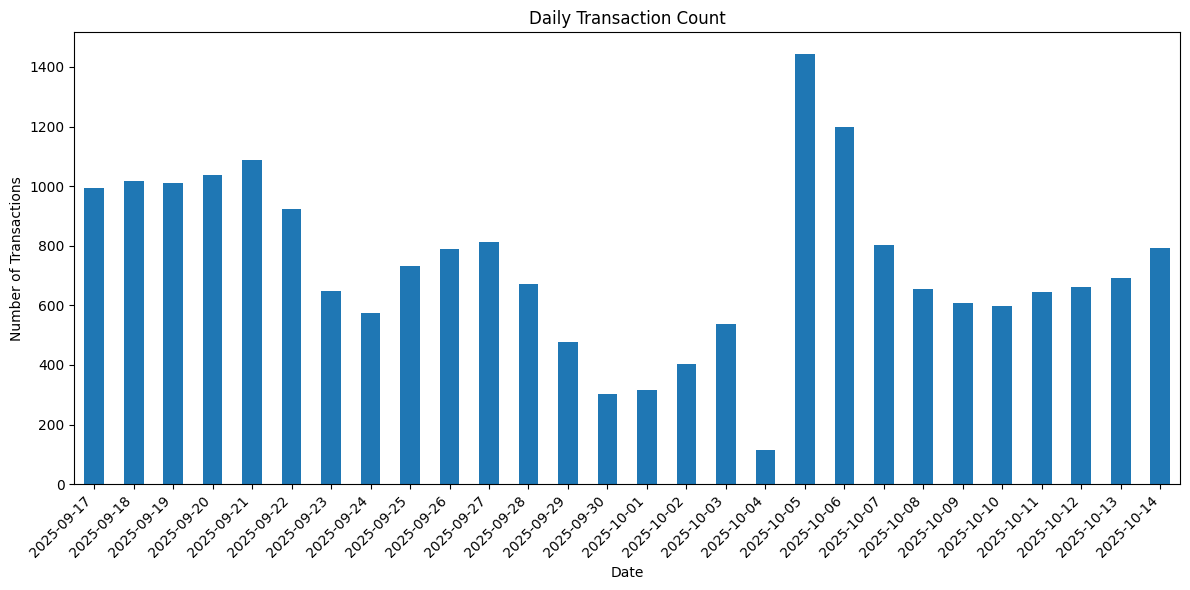

In [6]:
bus_df['Date'] = pd.to_datetime(bus_df['Date'])
daily_transactions = bus_df['Date'].dt.date.value_counts().sort_index()

plt.figure(figsize=(12, 6))
daily_transactions.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
arrival_location_counts = bus_df['Arrival Location'].value_counts()
arrival_location_percentages = (arrival_location_counts / len(bus_df)) * 100

print("Arrival Location Counts:")
display(arrival_location_counts)

print("\nArrival Location Percentages:")
display(arrival_location_percentages.round(2))

Arrival Location Counts:


Arrival Location
Kathmandu           6670
Pokhara             2584
Butwal              2116
Bhairahawa          1027
Dhangadhi            543
                    ... 
Nepaltar               1
Chhinchu               1
Khotang Panchami       1
Janakinagar            1
Mathilo Jagat          1
Name: count, Length: 298, dtype: int64


Arrival Location Percentages:


Arrival Location
Kathmandu           32.46
Pokhara             12.57
Butwal              10.30
Bhairahawa           5.00
Dhangadhi            2.64
                    ...  
Nepaltar             0.00
Chhinchu             0.00
Khotang Panchami     0.00
Janakinagar          0.00
Mathilo Jagat        0.00
Name: count, Length: 298, dtype: float64

In [8]:
dept_location_counts = bus_df['Departure location'].value_counts()
dept_location_percentages = (dept_location_counts / len(bus_df)) * 100

print("Depart Location Counts:")
display(dept_location_counts)

print("\nDepart Location Percentages:")
display(dept_location_percentages.round(2))

Depart Location Counts:


Departure location
Kathmandu          12106
Pokhara             2603
Butwal              1438
Bhairahawa           835
Chitwan              294
                   ...  
Marpha                 1
Hatiya                 1
Chakal chauraha        1
Gargare                1
Tatopani               1
Name: count, Length: 233, dtype: int64


Depart Location Percentages:


Departure location
Kathmandu          58.91
Pokhara            12.67
Butwal              7.00
Bhairahawa          4.06
Chitwan             1.43
                   ...  
Marpha              0.00
Hatiya              0.00
Chakal chauraha     0.00
Gargare             0.00
Tatopani            0.00
Name: count, Length: 233, dtype: float64

In [9]:
account_ticket_counts = bus_df['Account_id'].value_counts().reset_index()
account_ticket_counts.columns = ['Account_id', 'Ticket_Count']

# Merge with the original DataFrame to get the Account Name
account_ticket_counts = account_ticket_counts.merge(bus_df[['Account_id', 'Name']], on='Account_id', how='left').drop_duplicates(subset=['Account_id'])

# Display the result
print("Top Accounts by Ticket Count:")
display(account_ticket_counts.nlargest(10, 'Ticket_Count'))

Top Accounts by Ticket Count:


,Account_id,Ticket_Count,Name
0,175897,1244,Akata Thapa
1244,1030603,10,Karun Khatri
1254,12132271,8,SUK BHAWAN PARIYAR
1262,9841020,7,Nayan Kandel
1269,4066239,7,Kumar Gurung
1276,5447291,6,Kushal Dhakal
1282,1849382,6,Vikas kumar Jaiswal
1288,929312,6,Ravi Sharma
1294,249362,6,Gopal khanal
1300,3773710,6,Binod Gyawali


In [10]:
product_code_counts = bus_df['Product Code'].value_counts()
product_code_percentages = (product_code_counts / len(bus_df)) * 100
product_code_summary = pd.DataFrame({
    'Count': product_code_counts,
    'Percentage': product_code_percentages
})

product_name_counts = bus_df['Product name'].value_counts()
product_name_percentages = (product_name_counts / len(bus_df)) * 100
product_name_summary = pd.DataFrame({
    'Count': product_name_counts,
    'Percentage': product_name_percentages
})

print("Product Code Distribution:")
display(product_code_summary.round(2))

print("\nProduct Name Distribution:")
display(product_name_summary.round(2))

Product Code Distribution:


,Count,Percentage
Product Code,,
NP-ES-BUSSEWA0-DIRECT,20549,100.0



Product Name Distribution:


,Count,Percentage
Product name,,
Bussewa 0 - DIRECT,20549,100.0


In [11]:
total_seats_per_destination = bus_df.groupby('Arrival Location')['Total_seats'].sum()
print("Top 10 Arrival Locations by Total Seats:")
display(total_seats_per_destination.nlargest(10))


Top 10 Arrival Locations by Total Seats:


Arrival Location
Kathmandu     11148
Pokhara        4823
Butwal         3473
Bhairahawa     1848
Chitwan         952
Dhangadhi       891
Nepalgunj       615
Kushma          414
Kohalpur        384
Beni            359
Name: Total_seats, dtype: int64

In [13]:
bus_df.columns

Index(['Bus services Type', 'Date', 'Account_id', 'Name', 'Txn_code',
       'Product Code', 'Product name', 'Status', 'child_txn', 'child_status',
       'User Type', 'Departure location', 'Arrival Location',
       'Bus operator name', 'Contact_person', 'Total_seats',
       'Transaction amount', 'tripDate'],
      dtype='object')

Distribution of days between booking and trip date:


booking_to_trip_days
-4668.0       1
-19.0         1
-15.0         1
-14.0         1
-13.0         2
-12.0         3
-11.0         2
-10.0         2
-9.0          3
-8.0          2
-7.0          2
-6.0          3
-5.0          9
-4.0         14
-3.0         73
-2.0        627
-1.0       4893
 0.0       7236
 1.0       2600
 2.0       1295
 3.0        859
 4.0        646
 5.0        532
 6.0        469
 7.0        378
 8.0        332
 9.0        201
 10.0       151
 11.0        88
 12.0        37
 13.0        20
 14.0        15
 15.0         6
 16.0         6
 17.0         6
 18.0         3
 20.0         3
 21.0         1
 22.0         1
 23.0         1
 24.0         1
 25.0         2
 27.0         2
 28.0         1
 29.0         4
Name: count, dtype: int64

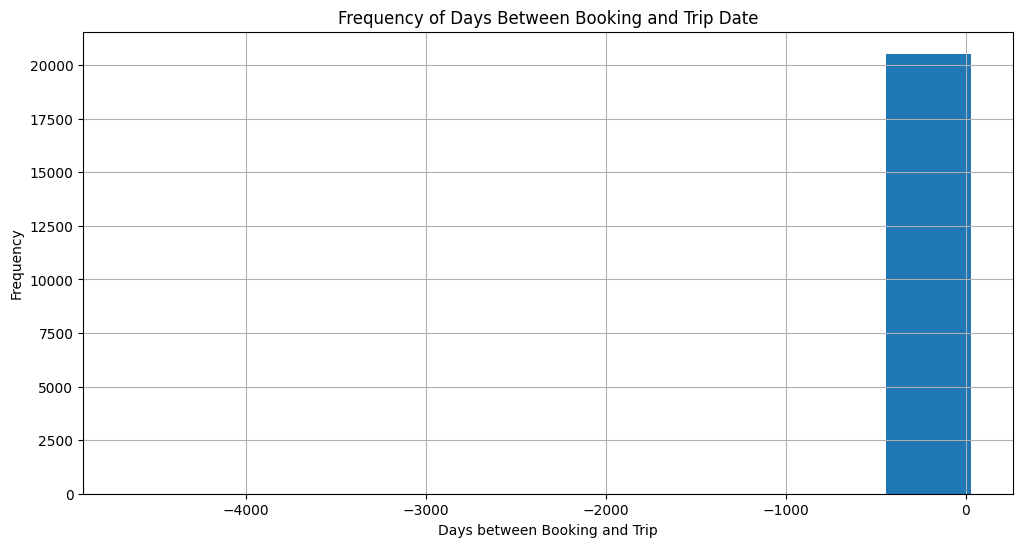

In [18]:
# Convert 'tripDate' to datetime objects, coercing errors
bus_df['tripDate'] = pd.to_datetime(bus_df['tripDate'], errors='coerce')

# Calculate the difference in days between 'Date' and 'tripDate'
bus_df['booking_to_trip_days'] = (bus_df['tripDate'] - bus_df['Date']).dt.days

# Display the distribution of the time difference
print("Distribution of days between booking and trip date:")
display(bus_df['booking_to_trip_days'].value_counts().sort_index())

# Visualize the distribution
plt.figure(figsize=(12, 6))
bus_df['booking_to_trip_days'].hist(bins=10)
plt.xlabel('Days between Booking and Trip')
plt.ylabel('Frequency')
plt.title('Frequency of Days Between Booking and Trip Date')



plt.show()